В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдені параметри моделі близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
medical_df = pd.read_csv('medical-charges.csv') 
non_smoker_df = medical_df[medical_df.smoker == 'no']

# Least Squares Method

In [3]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [4]:
X = non_smoker_df['age']
y = non_smoker_df['charges']

In [5]:
X, y

(1       18
 2       28
 3       33
 4       32
 5       31
         ..
 1332    52
 1333    50
 1334    18
 1335    18
 1336    21
 Name: age, Length: 1064, dtype: int64,
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
 5        3756.62160
            ...     
 1332    11411.68500
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 Name: charges, Length: 1064, dtype: float64)

In [6]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(1    18
 2    28
 3    33
 Name: age, dtype: int64,
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [7]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [9]:
print('Model coeficients via LSM:')
MNK_coefs

Model coeficients via LSM:


array([-2091.42055657,   267.24891283])

In [10]:
np.dot(X_with_intercept[0], MNK_coefs)

np.float64(2719.059874396515)

In [11]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [13]:
print('Model predictions:')
predictions_MNK[:3], y[:3]

Model predictions:


(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 Name: charges, dtype: float64)

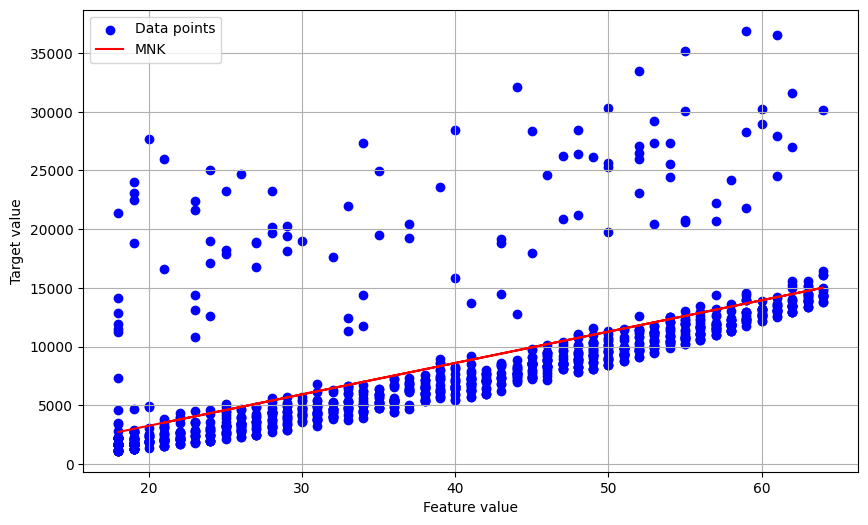

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Feature value')
plt.ylabel('Target value')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
def estimate_charges(age, w, b):
    return w * age + b

In [16]:
def rmse(df, w, b):
    ages = df.age
    target = df.charges
    estimated_charges = estimate_charges(ages, w, b)

    y_actual = np.array(target)
    y_predicted = np.array(estimated_charges)

    rmse =  ( ( (y_predicted - y_actual) ** 2).mean()) ** 0.5
    
    return rmse     

In [39]:
print('RMSE for LSM is equal:',rmse(non_smoker_df, MNK_coefs[1], MNK_coefs[0]))


RMSE for LSM is equal: 4662.505766636395


#### Conclusion 
We obtained a model that is close to the real data.

# Full-Batch Gradient Descent

In [20]:
# Gradient Descent
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Starting parameters
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [22]:
X_fbgd = X.values.reshape(-1, 1)
y_fbgd = y.values 

In [24]:
print('Let us try learning rate 0.01 and number of epochs equal to 100')
m, b, errors = full_batch_gradient_descent(X_fbgd, y_fbgd, lr=0.01, epochs=100)
predictions_fbgd = m * X_fbgd[:, 0] + b

m, b

Let us try learning rate 0.01 and number of epochs equal to 100


/var/folders/hn/5lk_57yn0d7cpr51y6djkz040000gq/T/ipykernel_9281/1318073006.py:9: RuntimeWarning: overflow encountered in square
  errors.append(sum(error**2))
/var/folders/hn/5lk_57yn0d7cpr51y6djkz040000gq/T/ipykernel_9281/1318073006.py:9: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error**2))


(np.float64(-3.1385990953955576e+155), np.float64(-7.066740077737107e+153))

We got "RuntimeWarning: overflow encountered in square
  errors.append(sum(error**2))" , so we need try another pair of parameters

In [25]:
print('Let us try learning rate 0.001 and number of epochs equal to 500')
m, b, errors = full_batch_gradient_descent(X_fbgd, y_fbgd, lr=0.001, epochs=500)
predictions_fbgd = m * X_fbgd[:, 0] + b

m, b

Let us try learning rate 0.001 and number of epochs equal to 500


/var/folders/hn/5lk_57yn0d7cpr51y6djkz040000gq/T/ipykernel_9281/1318073006.py:9: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error**2))
/var/folders/hn/5lk_57yn0d7cpr51y6djkz040000gq/T/ipykernel_9281/1318073006.py:9: RuntimeWarning: overflow encountered in square
  errors.append(sum(error**2))


(np.float64(-2.2674859861466908e+201), np.float64(-5.105377783839127e+199))

In [27]:
print('Let us try learning rate 0.0005 and number of epochs equal to 30')
m, b, errors = full_batch_gradient_descent(X_fbgd, y_fbgd, lr=0.0005, epochs=30)
predictions_fbgd = m * X_fbgd[:, 0] + b

m, b

Let us try learning rate 0.0005 and number of epochs equal to 30


(np.float64(220.1681648131126), np.float64(-2.155007090309337))

So we can use lr=0.0005, epochs=30

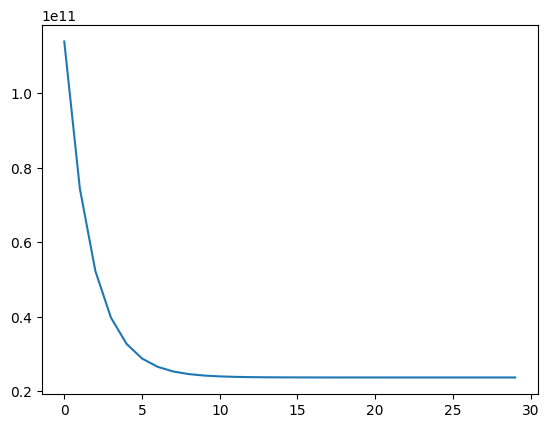

In [28]:
print('Graph of errors')
plt.plot(errors);

In [40]:
print('RMSE for Full-Batch Gradient Descent is equal:',(((y_fbgd - predictions_fbgd)**2).mean()) ** 0.5)

RMSE for Full-Batch Gradient Descent is equal: 4715.2311706274195


#### Conclusion 
RMSE is higher for Full-Batch Gradient Descent than for LSM, but not so  much, so we can conclude that we got close coefficient to analytical solution

# scikit-learn.LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [31]:
lin_reg.fit(X.to_frame(), y.to_frame())

LinearRegression()

In [32]:
print('Model coeficients:')
lin_reg.coef_, lin_reg.intercept_

(array([[267.24891283]]), array([-2091.42055657]))

In [34]:
predictions_sklearn = lin_reg.predict(X.to_frame())

In [41]:
print('RMSE for scikit-learn.LinearRegression is equal:',(((y.to_frame() - predictions_sklearn)**2).mean()) ** 0.5)

RMSE for scikit-learn.LinearRegression is equal: charges    4662.505767
dtype: float64


#### Conclusion 
RMSE for scikit-learn.LinearRegression is equal to RMSE of LSM

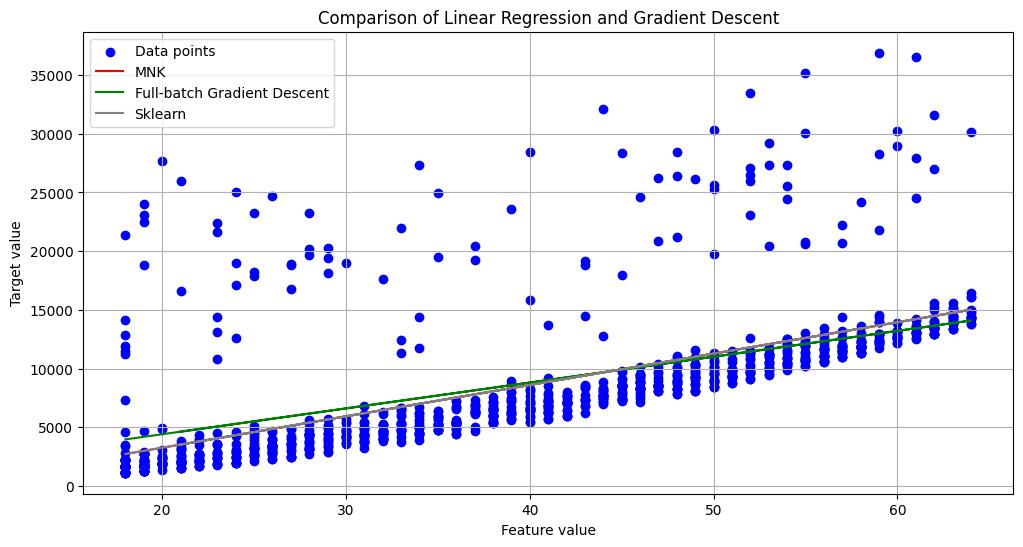

In [37]:
# Visualisatoin of results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Feature value')
plt.ylabel('Target value')
plt.legend()
plt.grid(True)
plt.show()

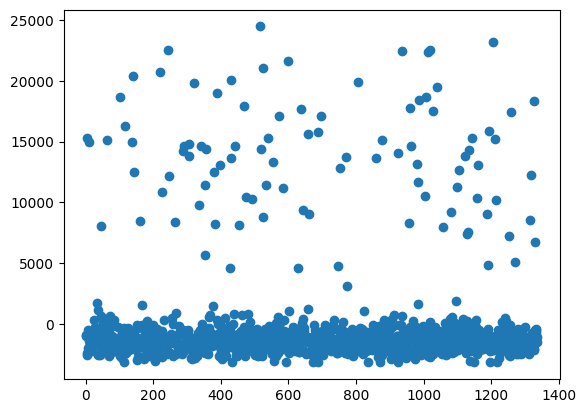

In [42]:
errors = y - predictions_MNK
plt.plot(errors, 'o');

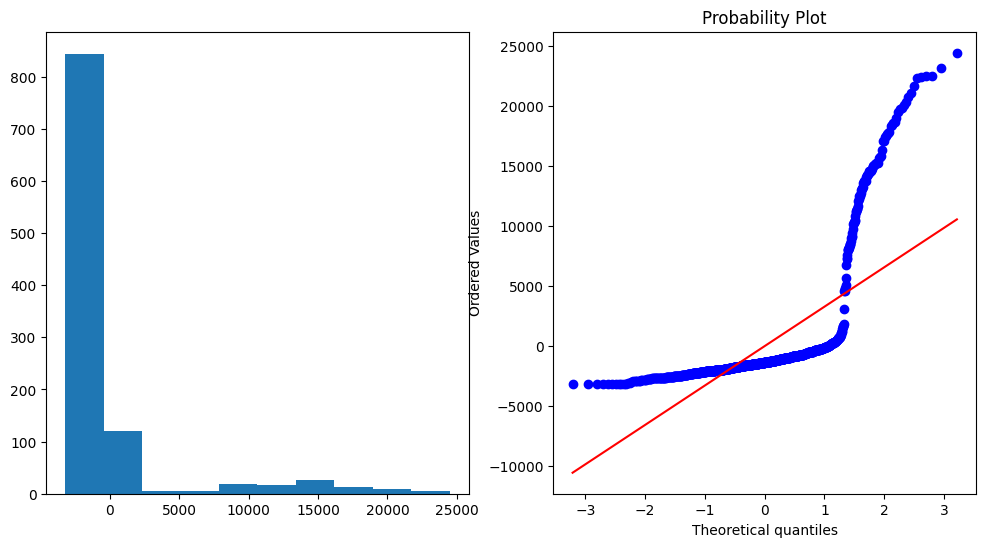

In [43]:
from scipy.stats import probplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(errors)
plt.subplot(1,2,2)
probplot(errors, dist='norm', plot=plt);

## Conclusion
- LSM is equivalent to scikit-learn.LinearRegression, and Full-Batch Gradient Descent is a good approximation of the LSM solution. However, given the distribution of errors, we can conclude that model should be improved.

# **Завдання 2.** 
 Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [44]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [45]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [46]:
X = smoker_df['age']
y = smoker_df['charges']

In [47]:
X = X.values.reshape(-1, 1)
y = y.values 
lin_reg.fit(X, y)

LinearRegression()

In [51]:
print('Model coeficients:')
lin_reg.coef_, lin_reg.intercept_

Model coeficients:


(array([305.23760211]), np.float64(20294.12812691597))

In [52]:
predictions_sklearn = lin_reg.predict(X)

In [53]:
print('RMSE for scikit-learn.LinearRegression is equal:',(((y - predictions_sklearn)**2).mean()) ** 0.5)

RMSE for scikit-learn.LinearRegression is equal: 10711.00334810241


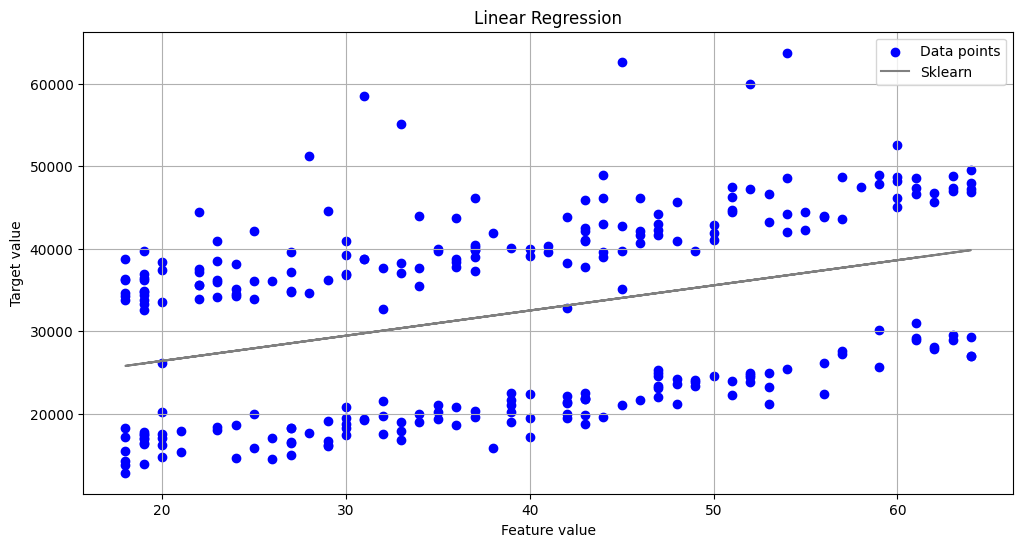

In [54]:
# Visualisatoin of results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
#plt.plot(X, predictions_MNK, color='red', label='MNK')
#plt.plot(X, predictions_fbgd, color='green', label='Full-batch Gradient Descent')
#plt.plot(X, predictions_sgd, color='orange', label='Stochastic Gradient Descent')
plt.plot(X, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Linear Regression')
plt.xlabel('Feature value')
plt.ylabel('Target value')
plt.legend()
plt.grid(True)
plt.show()

As we can see, charges for smokers are significantly higher than those for non-smokers. However, our information is not sufficient to accurately predict the exact values, as there is a cloud of points both above and below the linear line.

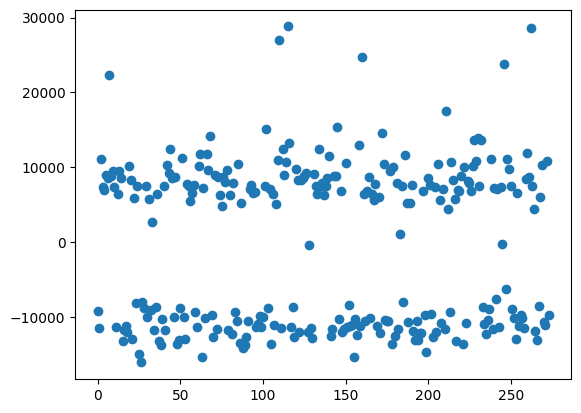

In [55]:
errors = y - predictions_sklearn
plt.plot(errors, 'o');

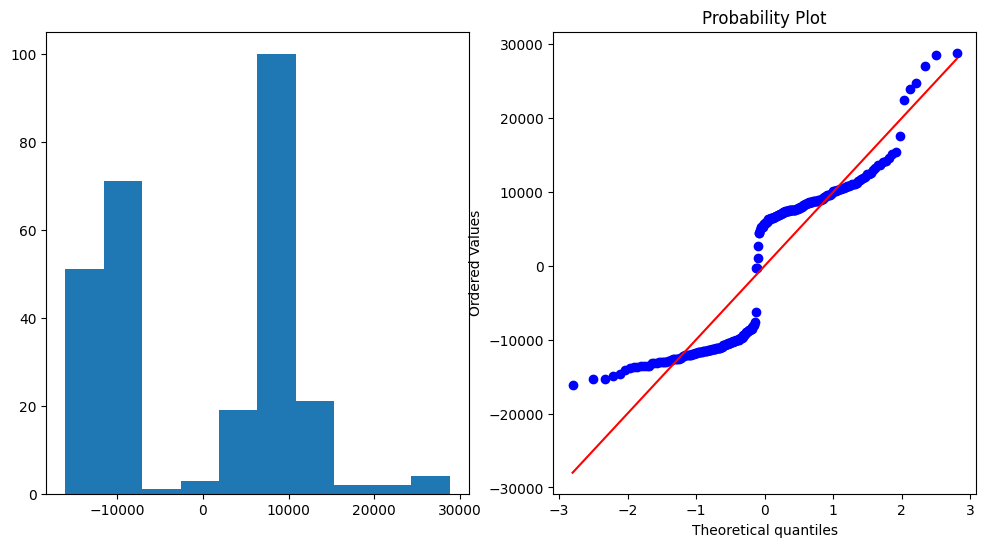

In [56]:
from scipy.stats import probplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(errors)
plt.subplot(1,2,2)
probplot(errors, dist='norm', plot=plt);

### Conclusion
Given the distribution of errors (which is neither homoscedastic nor normally distributed), we can conclude that the model should be improved. We cannot use it in the company at this time.